<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
# %config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [607]:
#reading with csv_reader
rows = []

with open(sat_scores, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
#rows        

In [608]:
# dictionary 2nd method
school_data={}
header= rows[0]
data=rows[1:]
for index,column_name in enumerate(header):
    school_data[column_name]= []
    for row in data:
        school_data[column_name].append(row[index])
        
school_data        

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

In [ ]:
# 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas .read_csv() function
Compare the DataFrames using the .dtypes attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type object (which are string values, essentially).

In [614]:
sat_scores = 'sat_scores.csv'
data= pd.read_csv(sat_scores)

types=data.dtypes
df=data.drop(data.index[51])
#deleting row 51
df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [611]:
dict_frame= pd.DataFrame.from_dict(school_data).head(10)
dict_frame.dtypes


State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [39]:
#The values of State is a string in dictionary whereas it is an object in dataframe.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [615]:
df.head(10)
df.describe().T

#df.Rate.value_counts()

,count,mean,std,min,25%,50%,75%,max
Rate,51.0,37.000000,27.550681,4.0,9.0,33.0,64.0,82.0
Verbal,51.0,532.529412,33.360667,482.0,501.0,527.0,562.0,593.0
Math,51.0,531.843137,36.287393,439.0,503.0,525.0,557.5,603.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
columns= df.columns
shape=df.shape
description=['Name of state','Rate of score','English avg score','Verbal avg score']


dict={}

dict=  {key: (value1,value2) for key, value1,value2 in zip(columns,description,types)}
dict['Shape'] = shape
dict
    


{'State': ('Name of state', dtype('O')),
 'Rate': ('Rate of score', dtype('int64')),
 'Verbal': ('English avg score', dtype('int64')),
 'Math': ('Verbal avg score', dtype('int64')),
 'Shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Rate')

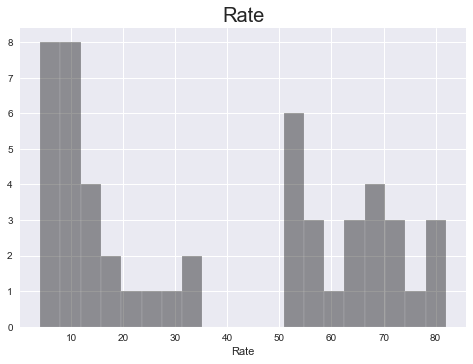

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')



ax= df['Rate']
sns.distplot(ax,kde=False,bins=20,color='black')
plt.title('Rate',size=20)


Text(0.5, 1.0, 'Maths Plot')

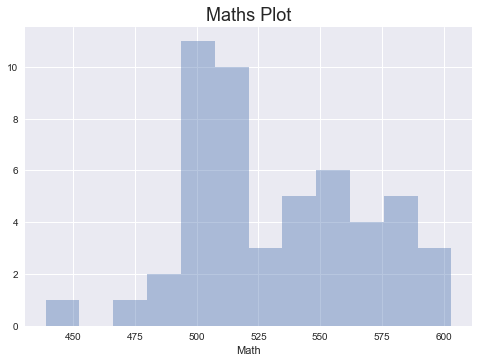

In [96]:

#ax= df['Math']
sns.distplot(df['Math'],kde=False,bins=12)
plt.title('Maths Plot', size=18)

Text(0, 0.5, 'No of students')

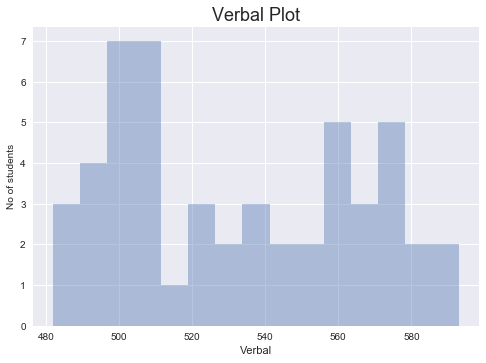

In [88]:
ax= df['Verbal']
sns.distplot(ax,kde=False,bins=15)
plt.title('Verbal Plot', size=18)
plt.ylabel('No of students',size=10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

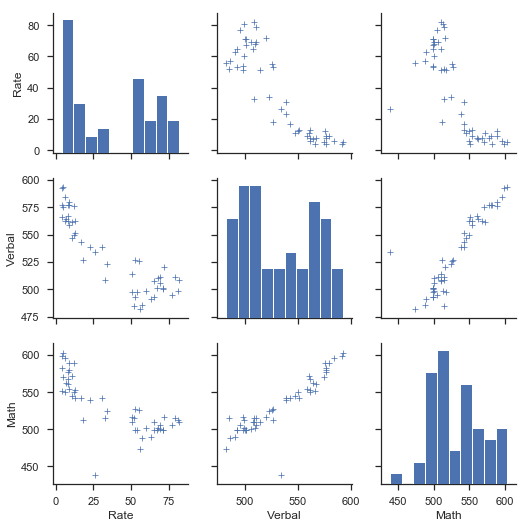

In [102]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars=['Rate','Verbal','Math'],palette="husl",markers="+")


# verbal and Maths score are in linear relationship. Higher rate for low scores of Verbal and Maths

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

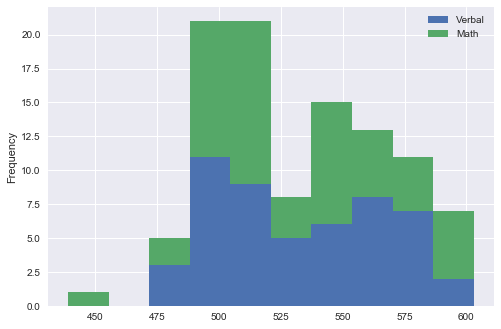

In [65]:
ax=df[['Verbal','Math']].plot(kind='hist',stacked=True)



### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

A box plot is a highly visually effective way of viewing a clear summary of one or more sets of data. Box plot use five key values ( ) to display the data, where as scatterplot or histomagram will not be able to manage such a large amount of data to represent in a single chart.
It is particularly useful for quickly summarizing and comparing different sets of results from different experiments.  Another benefit of box plot is one of very few statistical graph methods that show outliers. 

What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
The scale of Rate data is significantly vary from Math and Verbal data. So adding  Rate on the same box plot will not provide any meaningful visual representation.


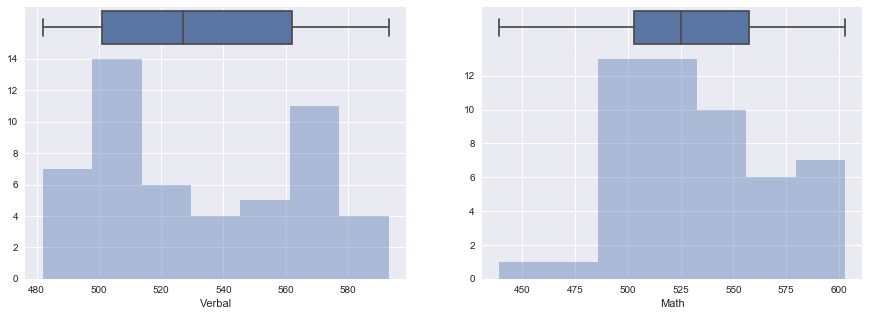

In [67]:
f, ([ax_box1, ax_box2], [ax_hist1, ax_hist2]) = plt.subplots(2, 2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Verbal"], ax=ax_box1)
sns.distplot(df["Verbal"], bins='auto', kde=False, ax=ax_hist1)
sns.boxplot(df["Math"].abs(), ax=ax_box2)
sns.distplot(df["Math"].abs(), bins='auto', kde=False, ax=ax_hist2)

ax_box1.set(xlabel='')
ax_box2.set(xlabel='')
ax_hist2.set(xlabel='Math')
f.subplots_adjust(hspace=0)
f.set_size_inches(15,5)

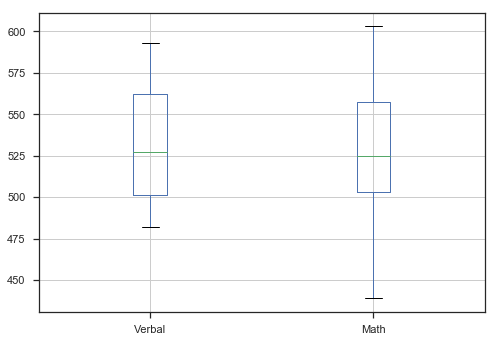

In [109]:


boxplot = df.boxplot(column=["Verbal","Math"])




In [ ]:
<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


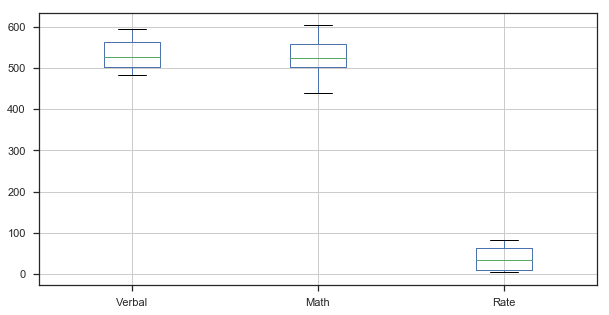

In [162]:
df.boxplot(column=["Verbal","Math","Rate"],figsize=(10,5))
#sns.boxplot(df,vars=["Verbal","Math","Rate"], orient='v',fliersize=8, linewidth=1.5, notch=False,saturation=0.5)

                

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [534]:
df['Verbal'].mean()

532.5294117647059

In [541]:
verbal_scores = df['Verbal']
verbal_scores
mean_verbal = verbal_scores.mean()
count=0
high_scores=[]
for value in verbal_scores:
    
    if value>verbal_scores.mean():
        high_scores.append(value)
    
        count+=1       


print('Number of states having score greater than mean: ' + str(count))

Number of states having score greater than mean: 24


In [544]:
df.loc[df['Verbal']<df['Verbal'].mean(),['State','Rate','Verbal']]

,State,Rate,Verbal
0,CT,82,509
1,NJ,81,499
2,MA,79,511
3,NY,77,495
4,NH,72,520
5,RI,71,501
6,PA,71,500
7,VT,69,511
8,ME,69,506
9,VA,68,510


In [546]:
df.loc[df['Verbal']>df['Verbal'].mean(),['State','Rate','Verbal']]

,State,Rate,Verbal
26,CO,31,539
27,OH,26,534
28,MT,23,539
30,ID,17,543
31,TN,13,562
32,NM,13,551
33,IL,12,576
34,KY,12,550
35,WY,11,547
36,MI,11,561


The states with verbal score more than average score are having lower Rates.And the states with lower verbal scores are having higher Rates. So we can conclude that there is correlation between rates and the averazge score.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [69]:
df['Verbal'].median()
#df.loc[:,'Verbal'].median()

527.0

In [552]:
df_median=df.loc[df['Verbal']>df['Verbal'].median(),['State','Verbal','Rate']]
df_median.shape

#The number of states with score above median in both cases.And in this case also Rate is lower for these states.

(24, 3)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [71]:

df['Verbal-Math']= df['Verbal']-df['Math']
df.head(10)

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [72]:
df2= df.sort_values('Verbal-Math',ascending=False).head(10)
df2['verbal-math rank']=df2['Verbal-Math'].rank(ascending=False)

df2[:3]

,State,Rate,Verbal,Math,Verbal-Math,verbal-math rank
27,OH,26,534,439,95,1.0
50,MS,4,566,551,15,2.5
29,WV,18,527,512,15,2.5


In [73]:
df3= df.sort_values('Verbal-Math',ascending=True).head(10)
df3['verbal-math rank']=df3['Verbal-Math'].rank(ascending=True)
df3[:3]


,State,Rate,Verbal,Math,Verbal-Math,verbal-math rank
21,HI,52,485,515,-30,1.0
23,CA,51,498,517,-19,2.0
1,NJ,81,499,513,-14,3.0


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [74]:
df1= df.loc[:,['Verbal','Math','Rate']]
df1.corr(method='pearson')

,Verbal,Math,Rate
Verbal,1.000000,0.899909,-0.888121
Math,0.899909,1.000000,-0.773419
Rate,-0.888121,-0.773419,1.000000


Verbal score and math score are strongly correlated. And Math and Rate correlated more than Verbal and Rate.
As verbal score increases the rate decreases.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [122]:
df.describe()
#

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [533]:
df.cov()

,Rate,Verbal,Math,Percentile_rank
Rate,759.040000,-816.280000,-773.220000,7.814118
Verbal,-816.280000,1112.934118,1089.404706,-8.508235
Math,-773.220000,1089.404706,1316.774902,-8.315686
Percentile_rank,7.814118,-8.508235,-8.315686,0.084883



1.Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship
between two variables.
2.correlation values are standardized whereas, covariance values are not. We can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the 
product of the standard deviations of the same values.
3.Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
The value of covariance is affected by the change in scale of the variables.The value of correlation is not influenced by the change in scale of the values.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [531]:
import pandas as pd
missing_values=["n/a","na","-","," " "]
drug ="drug-use-by-age.csv"
data_drug = pd.read_csv(drug,na_values=missing_values)
data_drug


# This data requires cleaning as some values are missing. 

#data_drug.isnull().sum()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [275]:
data_drug.shape

(17, 28)

In [528]:
data_drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.000,2798.00,3058.000,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.100,64.60,77.500,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.700,20.80,28.400,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.500,2.00,4.000,4.9
cocaine-frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.000,0.40,0.500,0.6
crack-frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.100,0.20,0.600,1.1


In [46]:
data_drug.corr().head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

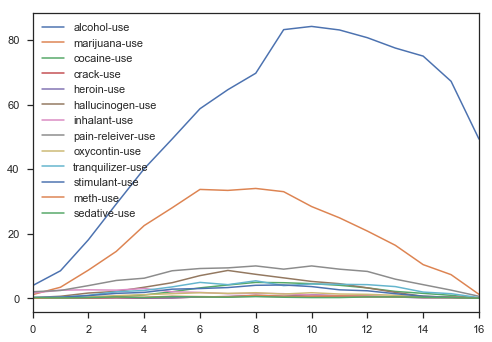

In [445]:
drugs_use_only= data_drug.iloc[:,[2,4,6,8,10,12,14,16,18,20,22,24,26]]
drugs_use_only.plot()

#From the above graph we can conclude that alcohol use is more than individual drug use. So I want to check how alcohol and drugs affect teenagers. For that I add up each of the drug types use and put in a column called Drug_use_total. and I am comparing the 'alcohol-use' and 'Drug_use_total'.


From below graph , we can conclude that drug use is reducing after age 20. Alcohol use is increasing and reducing after age 60.

    

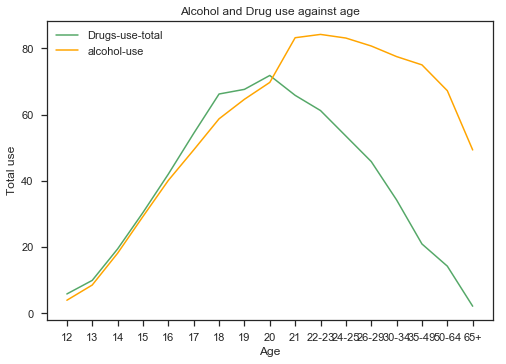

In [603]:
plt.plot(data_drug['age'], data_drug['Drugs-use-total'], color='g')
plt.plot(data_drug['age'], data_drug['alcohol-use'], color='orange')
plt.xlabel('Age')
plt.ylabel('Total use')
plt.title('Alcohol and Drug use against age')
plt.legend(('Drugs-use-total','alcohol-use'))


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [561]:
drugs= list(data_drug.columns[range(4,28,2)])
for columns in drugs:

    data_drug['Drugs-use-total']= data_drug[drugs].sum(axis=1)

data_drug[['age','Drugs-use-total','alcohol-use']]
    

,age,Drugs-use-total,alcohol-use
0,12,5.8,3.9
1,13,9.9,8.5
2,14,19.4,18.1
3,15,30.4,29.2
4,16,42.0,40.1
5,17,54.3,49.3
6,18,66.2,58.7
7,19,67.6,64.6
8,20,71.8,69.7
9,21,65.8,83.2


In [562]:
data_teenagers= data_drug[['age','Drugs-use-total','alcohol-use']].loc[:7]

print('Mean of total drug use in teenagers: ' + str(data_teenagers['Drugs-use-total'].mean()))
print('Mean of alcohol-use in teenagers: ' + str(data_teenagers['alcohol-use'].mean()))

Mean of total drug use in teenagers: 36.95
Mean of alcohol-use in teenagers: 34.05


In [504]:
data_teenagers

,age,Drugs-use-total,alcohol-use
0,12,5.8,3.9
1,13,9.9,8.5
2,14,19.4,18.1
3,15,30.4,29.2
4,16,42.0,40.1
5,17,54.3,49.3
6,18,66.2,58.7
7,19,67.6,64.6


In [563]:
#To calculate the T statistic

import scipy.stats as stats
stats.ttest_ind(data_drug['Drugs-use-total'], data_drug['alcohol-use'])

Ttest_indResult(statistic=-1.8719491568590627, pvalue=0.0703780186866898)

In [564]:
#creating a dataframe with age, drug use and alcohol use for all ages.
data_drug_alcohol_use= data_drug[['age','Drugs-use-total','alcohol-use']]

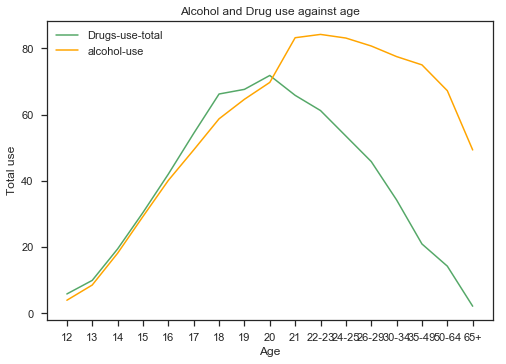

In [591]:
plt.plot(data_drug['age'], data_drug['Drugs-use-total'], color='g')
plt.plot(data_drug['age'], data_drug['alcohol-use'], color='orange')
plt.xlabel('Age')
plt.ylabel('Total use')
plt.title('Alcohol and Drug use against age')
plt.legend(('Drugs-use-total','alcohol-use'))


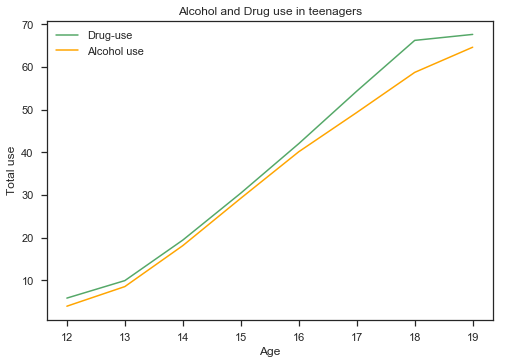

In [532]:
plt.plot(data_teenagers['age'], data_teenagers['Drugs-use-total'], color='g')
plt.plot(data_teenagers['age'], data_teenagers['alcohol-use'], color='orange')
plt.xlabel('Age')
plt.ylabel('Total use')
plt.title('Alcohol and Drug use in teenagers')
plt.legend(('Drug-use','Alcohol use'))
plt.show()

**Report**
#H0 =MEAN (Drugs-use-total')-MEAN(alcohol_use)=0 among teenagers
Ha= MEAN (Drugs-use-total')-MEAN(alcohol use)>0 among teengers
alpha=.05
p-value> .05
The p-value (> 0.05) indicates weak evidence against the null hypothesis, so fail to reject the null hypothesis which is teenagers alcohol use and drug use are of same level. The p-values is very close to the cutoff (0.05),  so this can go either way. 

As shown in the graph, from the given data set I have extracted "alcohol use" and "drug use" data for teenagers(age<20). The evidence indicates that the drug usage is slightly higher among teenagers, however the P value is not significant enough to reject the null hypothesis.






...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

2.Are there outliers in the dataset? Define, in words, how you numerically define outliers.
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset
Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation
3. No outliers in this dataset

In [515]:
#To find the outliers


df.std= df[np.abs(df.Rate-df.Rate.mean()) <= (3*df.Rate.std())]



#no outliers


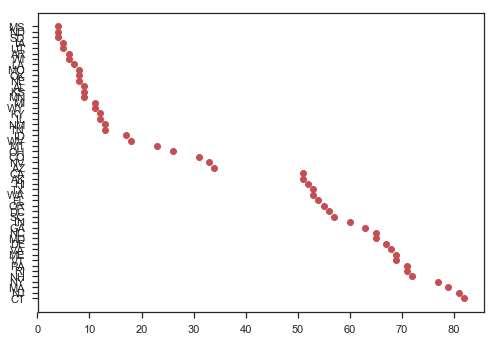

In [516]:
plt.scatter(df['Rate'],df['State'], color='r')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [490]:
df[['Verbal','Math']].corr(method ='spearman') 


,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


1.Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.
2.The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [519]:
#df['Percentile_rank']=df.Rate.rank(pct=True)
df['Rate'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


0.0     4.0
0.1     6.0
0.2     8.0
0.3    11.0
0.4    17.0
0.5    33.0
0.6    53.0
0.7    57.0
0.8    67.0
0.9    71.0
1.0    82.0
Name: Rate, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.